# Group Project #1, Crime vs. Weather - City of Chicago

- by Rula, Jia and Lucas

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [2]:
#import weather dataset for chicago and read csv file

chicago_weather_df = pd.read_csv("chicago_historical_weather.csv", encoding = "utf-8")

#check for csv file for columns and field names
chicago_weather_df.head()

,Date,BARRINGTON 3SW,CHICAGO BOTANIC GARDEN,CHICAGO MIDWAY AP,CHICAGO MIDWAY AP 3SW,CHICAGO NORTHERLY ISLAND,CHICAGO OHARE INTL AP,CHICAGO PALWAUKEE AP,LITTLE RED SCHOOL HOUSE,PARK FOREST
0,1/1/2013,19.5,23,20,19.5,20.5,18.0,17.5,M,27
1,1/2/2013,13,17.5,20.5,20.5,21.5,20.0,20,M,17.5
2,1/3/2013,18,23,24.5,24.0,25.5,23.5,24,M,18.5
3,1/4/2013,19,21.5,25.5,25.0,26.5,24.5,25,M,21.5
4,1/5/2013,23.5,27,31,30.5,31.5,28.5,29.5,M,24


In [3]:
chicago_weather_df['Date'] = pd.to_datetime(chicago_weather_df['Date']).dt.date
chicago_weather_df['Year-Month-Date'] = chicago_weather_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
chicago_weather_df['Mean_Temperature'] = chicago_weather_df.mean(axis=1)
#create new dataframe for chicago weather with required columns including dt_iso, year-month-date and temparature in f
new_chicago_weather_df = chicago_weather_df[['Date','Year-Month-Date','Mean_Temperature']].copy()

new_chicago_weather_df = new_chicago_weather_df.rename(columns = {'Date':'Date (Datetime)','Year-Month-Date': 'Date'})
#check for result
new_chicago_weather_df.head()
#chicago_weather_df.head()

,Date (Datetime),Date,Mean_Temperature
0,2013-01-01,2013-01-01,18.75
1,2013-01-02,2013-01-02,20.25
2,2013-01-03,2013-01-03,23.75
3,2013-01-04,2013-01-04,24.75
4,2013-01-05,2013-01-05,29.50


In [4]:
#import crime dataset for chicago and read csv file

chicago_crime_df = pd.read_csv("Crimes_2013_to_2017.csv", encoding = 'utf-8')

#check for csv file for columns and field names
chicago_crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1,11162428,JA529032,2017-11-28 21:43:00,026XX S CALIFORNIA BLVD,5131,OTHER OFFENSE,VIOLENT OFFENDER: ANNUAL REGISTRATION,JAIL / LOCK-UP FACILITY,True,...,12.0,30.0,26,1158280.0,1886310.0,2017,02/11/2018 03:54:58 PM,41.843778,-87.694638,"(41.843778126, -87.694637678)"
1,2,11175304,JA545986,2017-12-11 19:15:00,007XX N SACRAMENTO BLVD,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,True,...,27.0,23.0,03,1156092.0,1904769.0,2017,02/11/2018 03:54:58 PM,41.894476,-87.702169,"(41.894475919, -87.702169158)"
2,3,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,4,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,5,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [5]:
#new_chicago_crime_df = chicago_crime_df[['ID','Date','Primary Type','Year']].copy()

#new_chicago_crime_df['Year'] = pd.to_numeric(new_chicago_crime_df['Year'])

#new_chicago_crime_df['Date'] = pd.to_datetime(new_chicago_crime_df['Date'])

#df.loc[df['channel'].isin(['sale','fullprice'])]

#new_chicago_crime_df = new_chicago_crime_df.loc[chicago_crime_df['Year'].isin(['2013','2014','2015','2016','2017'])]
#df[(df['Due Date'] >= '2017-01-01') & (df['Due Date'] <= '2017-02-01')]

#new_chicago_crime_df = new_chicago_crime_df[([chicago_crime_df['Date'] >= '2013-01-01') & (chicago_crime_df['Date'] <= '2017-12-31')]

#new_chicago_crime_df = new_chicago_crime_df[chicago_crime_df['Date'] >= '2013-01-01']
#new_chicago_crime_df = new_chicago_crime_df[chicago_crime_df1['Date'] <= '2017-12-31']
#new_chicago_crime_df.head()

In [6]:
#create new dataframe for crime of chicago with required columns only
new_chicago_crime_df = chicago_crime_df[['ID','Date','Primary Type']].copy()


#convert date-time into date
new_chicago_crime_df['Date'] = pd.to_datetime(new_chicago_crime_df['Date']).dt.date
#convert date to string as key for join
new_chicago_crime_df['Date'] = new_chicago_crime_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

#get year and month (this is string)
new_chicago_crime_df['Year-Month'] = new_chicago_crime_df['Date'].str[:7]

#get year and convert it from string to numeric for sorting purpose
new_chicago_crime_df['Year'] = new_chicago_crime_df['Year-Month'].str[:4]
new_chicago_crime_df['Year'] = pd.to_numeric(new_chicago_crime_df['Year'])

#get month and convert it from string to numeric for sorting purpose
new_chicago_crime_df['Month'] = new_chicago_crime_df['Year-Month'].str[-2:]
new_chicago_crime_df['Month'] = pd.to_numeric(new_chicago_crime_df['Month'])

#sort by year and month
new_chicago_crime_df = new_chicago_crime_df.sort_values(by=['Year','Month'])


new_chicago_crime_df.head()

,ID,Date,Primary Type,Year-Month,Year,Month
33,11042911,2013-01-01,DECEPTIVE PRACTICE,2013-01,2013,1
147,11228666,2013-01-01,CRIM SEXUAL ASSAULT,2013-01,2013,1
304,10898113,2013-01-01,SEX OFFENSE,2013-01,2013,1
348,11036043,2013-01-01,OFFENSE INVOLVING CHILDREN,2013-01,2013,1
1176,11240618,2013-01-01,OFFENSE INVOLVING CHILDREN,2013-01,2013,1


In [7]:
#merge crime dataframe with weather dataframe via date
merged_crime_weather_df = new_chicago_crime_df.merge(new_chicago_weather_df,on='Date')

#rename 'Primary Type' to 'Crime Type'
merged_crime_weather_df = merged_crime_weather_df.rename(columns = {'Primary Type':'Crime Type'})

#check for join result of data frame
merged_crime_weather_df.head()

,ID,Date,Crime Type,Year-Month,Year,Month,Date (Datetime),Mean_Temperature
0,11042911,2013-01-01,DECEPTIVE PRACTICE,2013-01,2013,1,2013-01-01,18.75
1,11228666,2013-01-01,CRIM SEXUAL ASSAULT,2013-01,2013,1,2013-01-01,18.75
2,10898113,2013-01-01,SEX OFFENSE,2013-01,2013,1,2013-01-01,18.75
3,11036043,2013-01-01,OFFENSE INVOLVING CHILDREN,2013-01,2013,1,2013-01-01,18.75
4,11240618,2013-01-01,OFFENSE INVOLVING CHILDREN,2013-01,2013,1,2013-01-01,18.75


In [8]:
#group by crime type
chicago_crime_grouped = merged_crime_weather_df.groupby('Crime Type')

#calculate total number of crime per type
count_chicago_crime = chicago_crime_grouped['ID'].count()

#create new data frame to house number of crime per type
count_chicago_crime_df = pd.DataFrame({'Number of Crime': count_chicago_crime})

#sort by number of crime from large to small
count_chicago_crime_df = count_chicago_crime_df.sort_values(by='Number of Crime',ascending = False)
count_chicago_crime_df = count_chicago_crime_df.reset_index()

#check for result - top five crime
count_chicago_crime_df.head()

,Crime Type,Number of Crime
0,THEFT,316180
1,BATTERY,251733
2,CRIMINAL DAMAGE,147322
3,NARCOTICS,111934
4,ASSAULT,89913


<Figure size 432x288 with 0 Axes>

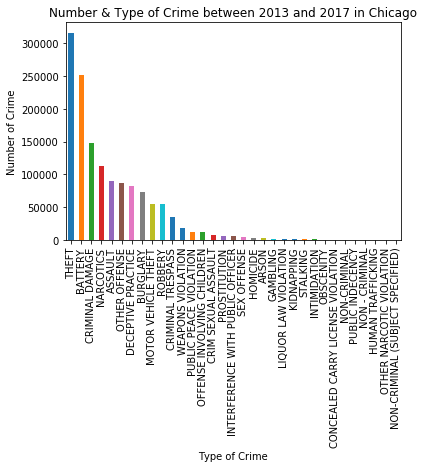

In [9]:
#create bar chart to show total number of crime per type
plt.figure(1) #,figsize=(50,10))
count_chart = count_chicago_crime_df.plot(kind='bar',x=count_chicago_crime_df['Crime Type'],y='Number of Crime')

#set title
plt.title("Number & Type of Crime between 2013 and 2017 in Chicago")
#set the xlabel and ylabel
count_chart.set_xlabel("Type of Crime")
count_chart.set_ylabel("Number of Crime")
#remove unecessary legend
count_chart.legend_.remove()
#set rotation vertically due to limited space
plt.xticks(rotation=90)

#show plot bar
plt.show()

In [10]:
#group by year-month and calucalte number of crime per year-month
count_chicago_crime_by_month_year = merged_crime_weather_df.groupby('Year-Month')['ID'].count()

#create new data set of total crime per year-month
count_chicago_crime_by_month_year_df = pd.DataFrame({'Number_of_Crime': count_chicago_crime_by_month_year})
count_chicago_crime_by_month_year_df = count_chicago_crime_by_month_year_df.reset_index()

#split year-month into year and month columns
count_chicago_crime_by_month_year_df['Month-Year_Dt_Format'] = pd.to_datetime(count_chicago_crime_by_month_year_df['Year-Month'])
count_chicago_crime_by_month_year_df['Year'] = count_chicago_crime_by_month_year_df['Month-Year_Dt_Format'].apply(lambda x: x.year)
count_chicago_crime_by_month_year_df['Month'] = count_chicago_crime_by_month_year_df['Month-Year_Dt_Format'].apply(lambda x: x.month)
count_chicago_crime_by_month_year_df = count_chicago_crime_by_month_year_df.drop('Month-Year_Dt_Format', 1)

#sort the data frame by year and month
count_chicago_crime_by_month_year_df = count_chicago_crime_by_month_year_df.sort_values(by=['Year', 'Month'])

#check for result
count_chicago_crime_by_month_year_df.head()

,Year-Month,Number_of_Crime,Year,Month
0,2013-01,25417,2013,1
1,2013-02,21387,2013,2
2,2013-03,24944,2013,3
3,2013-04,25510,2013,4
4,2013-05,27970,2013,5


In [11]:
#split crime data into 5 data frame per year, from 2013 to 2017

chicago_crime_year_2013_df = count_chicago_crime_by_month_year_df[count_chicago_crime_by_month_year_df['Year'] == 2013]
chicago_crime_year_2013_df = chicago_crime_year_2013_df.reset_index()
chicago_crime_year_2013_df = chicago_crime_year_2013_df.drop('index',1)

chicago_crime_year_2014_df = count_chicago_crime_by_month_year_df[count_chicago_crime_by_month_year_df['Year'] == 2014]
chicago_crime_year_2014_df = chicago_crime_year_2014_df.reset_index()
chicago_crime_year_2014_df = chicago_crime_year_2014_df.drop('index',1)

chicago_crime_year_2015_df = count_chicago_crime_by_month_year_df[count_chicago_crime_by_month_year_df['Year'] == 2015]
chicago_crime_year_2015_df = chicago_crime_year_2015_df.reset_index()
chicago_crime_year_2015_df = chicago_crime_year_2015_df.drop('index',1)

chicago_crime_year_2016_df = count_chicago_crime_by_month_year_df[count_chicago_crime_by_month_year_df['Year'] == 2016]
chicago_crime_year_2016_df = chicago_crime_year_2016_df.reset_index()
chicago_crime_year_2016_df = chicago_crime_year_2016_df.drop('index',1)

chicago_crime_year_2017_df = count_chicago_crime_by_month_year_df[count_chicago_crime_by_month_year_df['Year'] == 2017]
chicago_crime_year_2017_df = chicago_crime_year_2017_df.reset_index()
chicago_crime_year_2017_df = chicago_crime_year_2017_df.drop('index',1)

#check for yearly data frame:
#chicago_crime_year_2013_df
#chicago_crime_year_2014_df
#chicago_crime_year_2015_df
#chicago_crime_year_2016_df
chicago_crime_year_2017_df.head()

,Year-Month,Number_of_Crime,Year,Month
0,2017-01,21952,2017,1
1,2017-02,19204,2017,2
2,2017-03,20472,2017,3
3,2017-04,21592,2017,4
4,2017-05,23295,2017,5


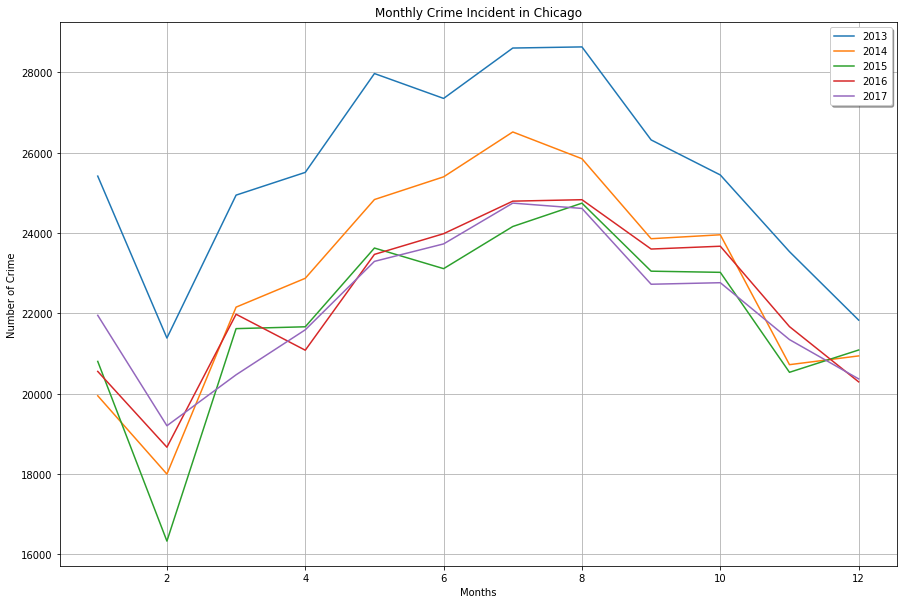

In [12]:
#create linear chart to show number of crime trend on monthly basis and 5 linear plot from 2013 to 2017
plt.figure(2, figsize=(15,10))

#5 linear plots from 2013 to 2017
plt.plot(chicago_crime_year_2013_df['Month'], chicago_crime_year_2013_df['Number_of_Crime'],label='2013')
plt.plot(chicago_crime_year_2014_df['Month'], chicago_crime_year_2014_df['Number_of_Crime'],label='2014')
plt.plot(chicago_crime_year_2015_df['Month'], chicago_crime_year_2015_df['Number_of_Crime'],label='2015')
plt.plot(chicago_crime_year_2016_df['Month'], chicago_crime_year_2016_df['Number_of_Crime'],label='2016')
plt.plot(chicago_crime_year_2017_df['Month'], chicago_crime_year_2017_df['Number_of_Crime'],label='2017')

#set max and min for y
#plt.ylim(ymax=2000)
#plt.ylim(ymin=0)

#set legend
legend = plt.legend(loc='upper right', shadow=True)

#set labels and title
plt.xlabel("Months")
plt.ylabel("Number of Crime")
plt.title("Monthly Crime Incident in Chicago")

#show the linear plot
plt.grid()
plt.show()

In [13]:
new_chicago_weather_df_v2 = new_chicago_weather_df
new_chicago_weather_df_v2.head()

,Date (Datetime),Date,Mean_Temperature
0,2013-01-01,2013-01-01,18.75
1,2013-01-02,2013-01-02,20.25
2,2013-01-03,2013-01-03,23.75
3,2013-01-04,2013-01-04,24.75
4,2013-01-05,2013-01-05,29.50


In [14]:
#new_chicago_weather_df


#get year and month (this is string)
new_chicago_weather_df_v2['Year-Month'] = new_chicago_weather_df_v2['Date'].str[:7]

#get year and convert it from string to numeric for sorting purpose
new_chicago_weather_df_v2['Year'] = new_chicago_weather_df_v2['Year-Month'].str[:4]
new_chicago_weather_df_v2['Year'] = pd.to_numeric(new_chicago_weather_df_v2['Year'])

#get month and convert it from string to numeric for sorting purpose
new_chicago_weather_df_v2['Month'] = new_chicago_weather_df_v2['Year-Month'].str[-2:]
new_chicago_weather_df_v2['Month'] = pd.to_numeric(new_chicago_weather_df_v2['Month'])

#sort by year and month
new_chicago_weather_df_v2 = new_chicago_weather_df_v2.sort_values(by=['Year','Month'])


new_chicago_weather_df_v2.head()

,Date (Datetime),Date,Mean_Temperature,Year-Month,Year,Month
0,2013-01-01,2013-01-01,18.75,2013-01,2013,1
1,2013-01-02,2013-01-02,20.25,2013-01,2013,1
2,2013-01-03,2013-01-03,23.75,2013-01,2013,1
3,2013-01-04,2013-01-04,24.75,2013-01,2013,1
4,2013-01-05,2013-01-05,29.50,2013-01,2013,1


In [15]:
#group by year-month and calucalte mean temperature per year-month
mean_chicago_weather_by_month = merged_crime_weather_df.groupby('Year-Month')['Mean_Temperature'].mean()

#create new data set of mean temperature per year-month
mean_chicago_weather_by_month_year_df = pd.DataFrame({'Average Temperature': mean_chicago_weather_by_month})
mean_chicago_weather_by_month_year_df = mean_chicago_weather_by_month_year_df.reset_index()

#split year-month into year and month columns
mean_chicago_weather_by_month_year_df['Month-Year_Dt_Format'] = pd.to_datetime(mean_chicago_weather_by_month_year_df['Year-Month'])
mean_chicago_weather_by_month_year_df['Year'] = mean_chicago_weather_by_month_year_df['Month-Year_Dt_Format'].apply(lambda x: x.year)
mean_chicago_weather_by_month_year_df['Month'] = mean_chicago_weather_by_month_year_df['Month-Year_Dt_Format'].apply(lambda x: x.month)
mean_chicago_weather_by_month_year_df = mean_chicago_weather_by_month_year_df.drop('Month-Year_Dt_Format', 1)

#sort the data frame by year and month
mean_chicago_weather_by_month_year_df = mean_chicago_weather_by_month_year_df.sort_values(by=['Year', 'Month'])

#check for result
mean_chicago_weather_by_month_year_df.head()

,Year-Month,Average Temperature,Year,Month
0,2013-01,27.276478,2013,1
1,2013-02,26.796033,2013,2
2,2013-03,33.084259,2013,3
3,2013-04,47.279802,2013,4
4,2013-05,61.988255,2013,5


In [16]:
chicago_weather_2013_df = mean_chicago_weather_by_month_year_df[mean_chicago_weather_by_month_year_df['Year'] == 2013]
chicago_weather_2013_df = chicago_weather_2013_df.reset_index()
chicago_weather_2013_df = chicago_weather_2013_df.drop('index',1)

chicago_weather_2014_df = mean_chicago_weather_by_month_year_df[mean_chicago_weather_by_month_year_df['Year'] == 2014]
chicago_weather_2014_df = chicago_weather_2014_df.reset_index()
chicago_weather_2014_df = chicago_weather_2014_df.drop('index',1)

chicago_weather_2015_df = mean_chicago_weather_by_month_year_df[mean_chicago_weather_by_month_year_df['Year'] == 2015]
chicago_weather_2015_df = chicago_weather_2015_df.reset_index()
chicago_weather_2015_df = chicago_weather_2015_df.drop('index',1)

chicago_weather_2016_df = mean_chicago_weather_by_month_year_df[mean_chicago_weather_by_month_year_df['Year'] == 2016]
chicago_weather_2016_df = chicago_weather_2016_df.reset_index()
chicago_weather_2016_df = chicago_weather_2016_df.drop('index',1)

chicago_weather_2017_df = mean_chicago_weather_by_month_year_df[mean_chicago_weather_by_month_year_df['Year'] == 2017]
chicago_weather_2017_df = chicago_weather_2017_df.reset_index()
chicago_weather_2017_df = chicago_weather_2017_df.drop('index',1)

chicago_weather_2013_df.head()
chicago_weather_2014_df.head()
chicago_weather_2015_df.head()
chicago_weather_2016_df.head()
chicago_weather_2017_df.head()

,Year-Month,Average Temperature,Year,Month
0,2017-01,30.223886,2017,1
1,2017-02,39.041892,2017,2
2,2017-03,40.217883,2017,3
3,2017-04,54.373078,2017,4
4,2017-05,58.629577,2017,5


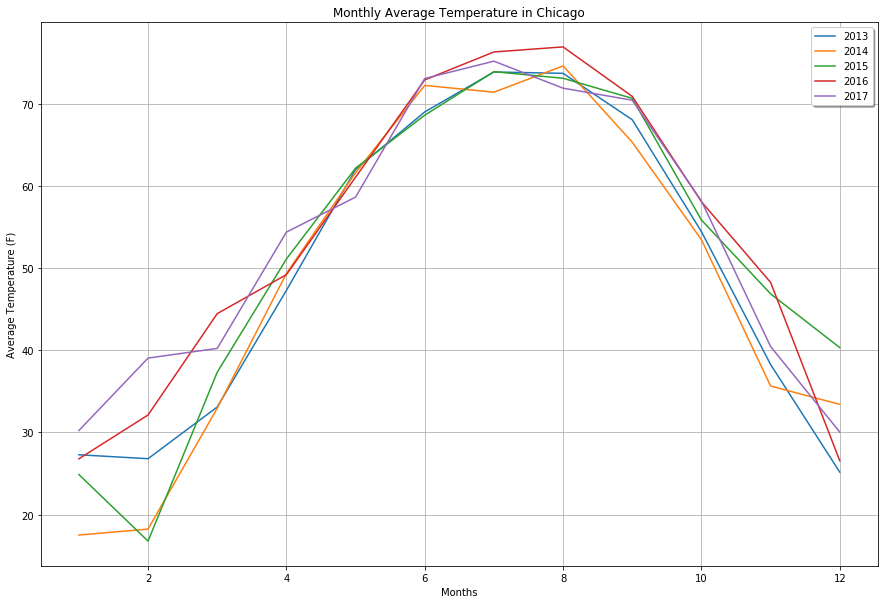

In [44]:
#create linear chart to show number of crime trend on monthly basis and 5 linear plot from 2013 to 2017
plt.figure(2.1, figsize=(15,10))

#5 linear plots from 2013 to 2017
plt.plot(chicago_weather_2013_df['Month'], chicago_weather_2013_df['Average Temperature'],label='2013')
plt.plot(chicago_weather_2014_df['Month'], chicago_weather_2014_df['Average Temperature'],label='2014')
plt.plot(chicago_weather_2015_df['Month'], chicago_weather_2015_df['Average Temperature'],label='2015')
plt.plot(chicago_weather_2016_df['Month'], chicago_weather_2016_df['Average Temperature'],label='2016')
plt.plot(chicago_weather_2017_df['Month'], chicago_weather_2017_df['Average Temperature'],label='2017')

#set max and min for y
#plt.ylim(ymax=2000)
#plt.ylim(ymin=0)

#set legend
legend = plt.legend(loc='upper right', shadow=True)

#set labels and title
plt.xlabel("Months")
plt.ylabel("Average Temperature (F)")
plt.title("Monthly Average Temperature in Chicago")

#show the linear plot
plt.grid()
plt.show()

In [18]:
#create 5 dataframe based on top 5 crimes
top_1_theft_weather_df = merged_crime_weather_df[merged_crime_weather_df['Crime Type']=='THEFT']

top_2_battery_weather_df = merged_crime_weather_df[merged_crime_weather_df['Crime Type']=='BATTERY']

top_3_criminal_damage_weather_df = merged_crime_weather_df[merged_crime_weather_df['Crime Type']=='CRIMINAL DAMAGE']

top_4_deceptive_practice_weather_df = merged_crime_weather_df[merged_crime_weather_df['Crime Type']=='DECEPTIVE PRACTICE']

top_4_narcotics_weather_df = merged_crime_weather_df[merged_crime_weather_df['Crime Type']=='NARCOTICS']

top_5_other_offense_weather_df = merged_crime_weather_df[merged_crime_weather_df['Crime Type']=='OTHER OFFENSE']

top_5_assault_weather_df = merged_crime_weather_df[merged_crime_weather_df['Crime Type']=='ASSAULT']

#check for new dataframe
top_1_theft_weather_df.head()
top_2_battery_weather_df.head()
top_3_criminal_damage_weather_df.head()
top_4_deceptive_practice_weather_df.head()
top_5_other_offense_weather_df.head()

,ID,Date,Crime Type,Year-Month,Year,Month,Date (Datetime),Mean_Temperature
77,10407462,2013-01-01,OTHER OFFENSE,2013-01,2013,1,2013-01-01,18.75
82,10431819,2013-01-01,OTHER OFFENSE,2013-01,2013,1,2013-01-01,18.75
105,10365302,2013-01-01,OTHER OFFENSE,2013-01,2013,1,2013-01-01,18.75
144,8951069,2013-01-01,OTHER OFFENSE,2013-01,2013,1,2013-01-01,18.75
160,8950948,2013-01-01,OTHER OFFENSE,2013-01,2013,1,2013-01-01,18.75


In [19]:
#create data frame for Theft with daily count and daily temparature
top_1_theft_weather_count = top_1_theft_weather_df.groupby('Date')['ID'].count()
top_1_theft_weather_daily_avg_temp = top_1_theft_weather_df.groupby('Date')['Mean_Temperature'].mean()
theft_daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': top_1_theft_weather_count,
                                           'Daily Average Temperature':top_1_theft_weather_daily_avg_temp})
theft_daily_crime_and_temp = theft_daily_crime_and_temp.reset_index()
theft_daily_crime_and_temp.head()

,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,253
1,2013-01-02,20.25,183
2,2013-01-03,23.75,144
3,2013-01-04,24.75,201
4,2013-01-05,29.50,160


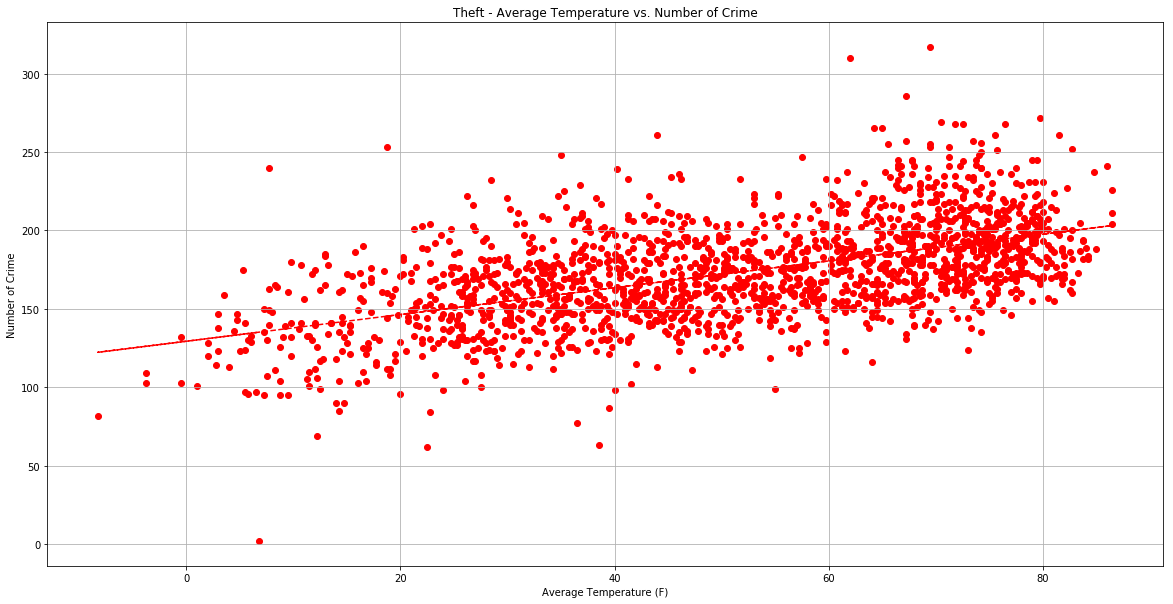

In [43]:
#Theft's number of crime per day vs. daily average temperature
plt.figure(3, figsize=(20,10))

plt.scatter(theft_daily_crime_and_temp['Daily Average Temperature'], 
            theft_daily_crime_and_temp['Number of Crime per Day'], marker="o", color="red")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(theft_daily_crime_and_temp['Daily Average Temperature'], theft_daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(theft_daily_crime_and_temp['Daily Average Temperature'],p(theft_daily_crime_and_temp['Daily Average Temperature']),"r--")


#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Theft - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [21]:
#create data frame for Battery with daily count and daily temparature
top_2_battery_crime_count = top_2_battery_weather_df.groupby('Date')['ID'].count()
top_2_battery_weather_daily_avg_temp = top_2_battery_weather_df.groupby('Date')['Mean_Temperature'].mean()
battery_daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': top_2_battery_crime_count,
                                           'Daily Average Temperature':top_2_battery_weather_daily_avg_temp})
battery_daily_crime_and_temp = battery_daily_crime_and_temp.reset_index()
battery_daily_crime_and_temp.head()

,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,283
1,2013-01-02,20.25,92
2,2013-01-03,23.75,111
3,2013-01-04,24.75,120
4,2013-01-05,29.50,118


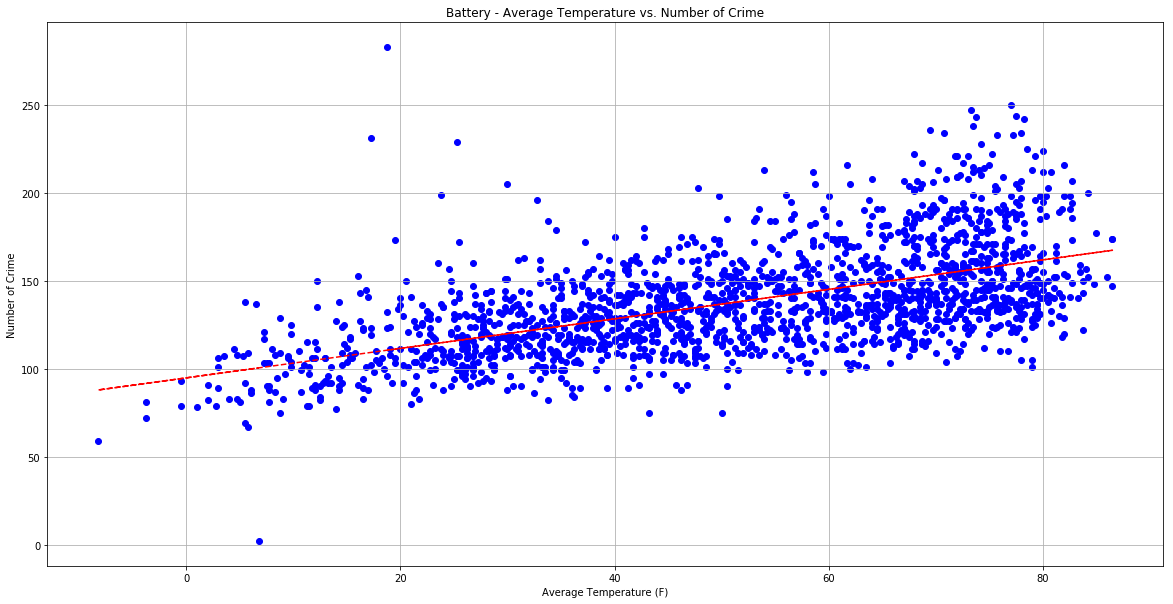

In [42]:
#Battery's number of crime per day vs. daily average temperature
plt.figure(4, figsize=(20,10))

plt.scatter(battery_daily_crime_and_temp['Daily Average Temperature'], 
            battery_daily_crime_and_temp['Number of Crime per Day'], marker="o", color="blue")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(battery_daily_crime_and_temp['Daily Average Temperature'], battery_daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(battery_daily_crime_and_temp['Daily Average Temperature'],p(battery_daily_crime_and_temp['Daily Average Temperature']),"r--")


#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Battery - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [23]:
#top_3_criminal_damage_weather_df.head()
#create data frame for Criminal Damage with daily count and daily temparature
top_3_criminal_damage_count = top_3_criminal_damage_weather_df.groupby('Date')['ID'].count()
top_3_criminal_damage_weather_daily_avg_temp = top_3_criminal_damage_weather_df.groupby('Date')['Mean_Temperature'].mean()
criminal_damage_daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': top_3_criminal_damage_count,
                                           'Daily Average Temperature':top_3_criminal_damage_weather_daily_avg_temp})
criminal_damage_daily_crime_and_temp = criminal_damage_daily_crime_and_temp.reset_index()
criminal_damage_daily_crime_and_temp.head()



,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,118
1,2013-01-02,20.25,80
2,2013-01-03,23.75,69
3,2013-01-04,24.75,80
4,2013-01-05,29.50,85


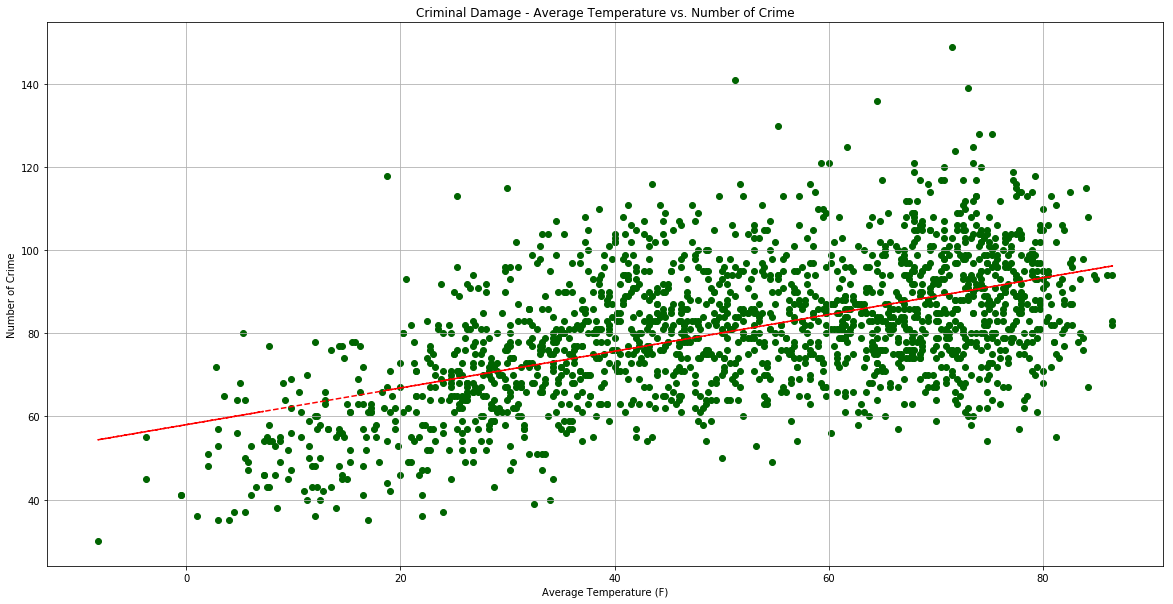

In [41]:
#Criminal Damage's number of crime per day vs. daily average temperature

plt.figure(5, figsize=(20,10))

plt.scatter(criminal_damage_daily_crime_and_temp['Daily Average Temperature'], 
            criminal_damage_daily_crime_and_temp['Number of Crime per Day'], marker="o", color="darkgreen")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(criminal_damage_daily_crime_and_temp['Daily Average Temperature'],
               criminal_damage_daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(criminal_damage_daily_crime_and_temp['Daily Average Temperature'],
         p(criminal_damage_daily_crime_and_temp['Daily Average Temperature']),"r--")


#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Criminal Damage - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [25]:
#top_4_deceptive_practice_weather_df.head()
#create data frame for Deceptive Practice with daily count and daily temparature
top_4_deceptive_practice_count = top_4_deceptive_practice_weather_df.groupby('Date')['ID'].count()
top_4_deceptive_practice_weather_daily_avg_temp = top_4_deceptive_practice_weather_df.groupby('Date')['Mean_Temperature'].mean()
deceptive_practice_daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': top_4_deceptive_practice_count,
                                           'Daily Average Temperature':top_4_deceptive_practice_weather_daily_avg_temp })
deceptive_practice_daily_crime_and_temp = deceptive_practice_daily_crime_and_temp.reset_index()
deceptive_practice_daily_crime_and_temp.head()

,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,153
1,2013-01-02,20.25,38
2,2013-01-03,23.75,34
3,2013-01-04,24.75,40
4,2013-01-05,29.50,25


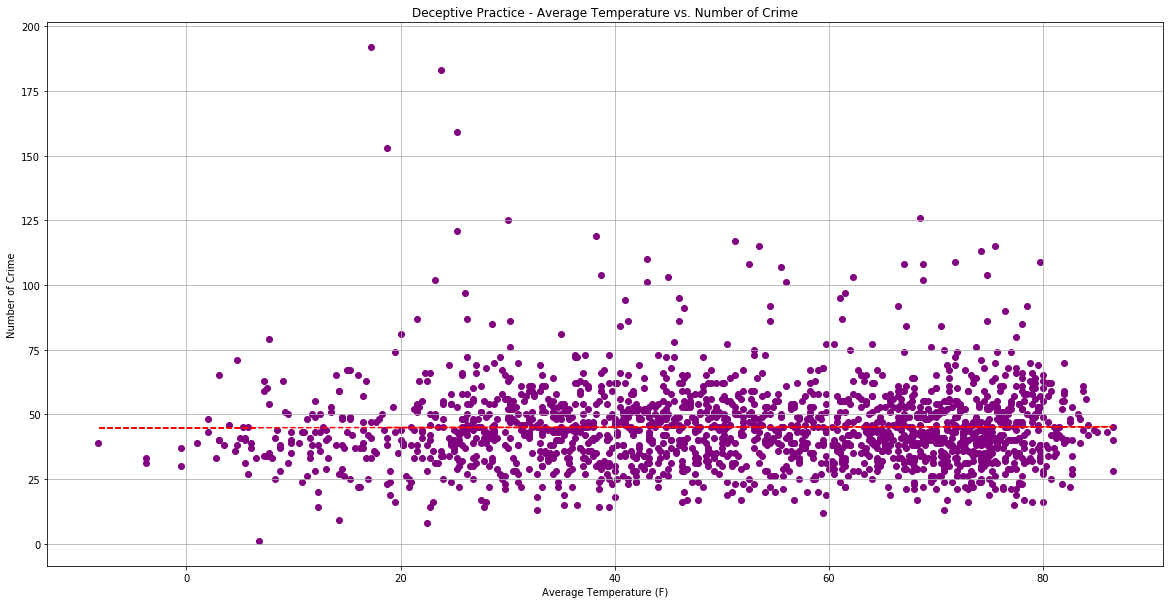

In [40]:
#Deceptive Practice's number of crime per day vs. daily average temperature
plt.figure(6, figsize=(20,10))

plt.scatter(deceptive_practice_daily_crime_and_temp['Daily Average Temperature'], 
            deceptive_practice_daily_crime_and_temp['Number of Crime per Day'], marker="o", color="purple")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(deceptive_practice_daily_crime_and_temp['Daily Average Temperature'],
               deceptive_practice_daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(deceptive_practice_daily_crime_and_temp['Daily Average Temperature'],
         p(deceptive_practice_daily_crime_and_temp['Daily Average Temperature']),"r--")


#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Deceptive Practice - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [27]:
#top_5_other_offense_weather_df.head()
#create data frame for Other Offense with daily count and daily temparature
top_5_other_offense_count = top_5_other_offense_weather_df.groupby('Date')['ID'].count()
top_5_other_offense_weather_daily_avg_temp = top_5_other_offense_weather_df.groupby('Date')['Mean_Temperature'].mean()
other_offense_daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': top_5_other_offense_count,
                                           'Daily Average Temperature':top_5_other_offense_weather_daily_avg_temp})
other_offense_daily_crime_and_temp = other_offense_daily_crime_and_temp.reset_index()
other_offense_daily_crime_and_temp.head()

,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,91
1,2013-01-02,20.25,59
2,2013-01-03,23.75,58
3,2013-01-04,24.75,67
4,2013-01-05,29.50,52


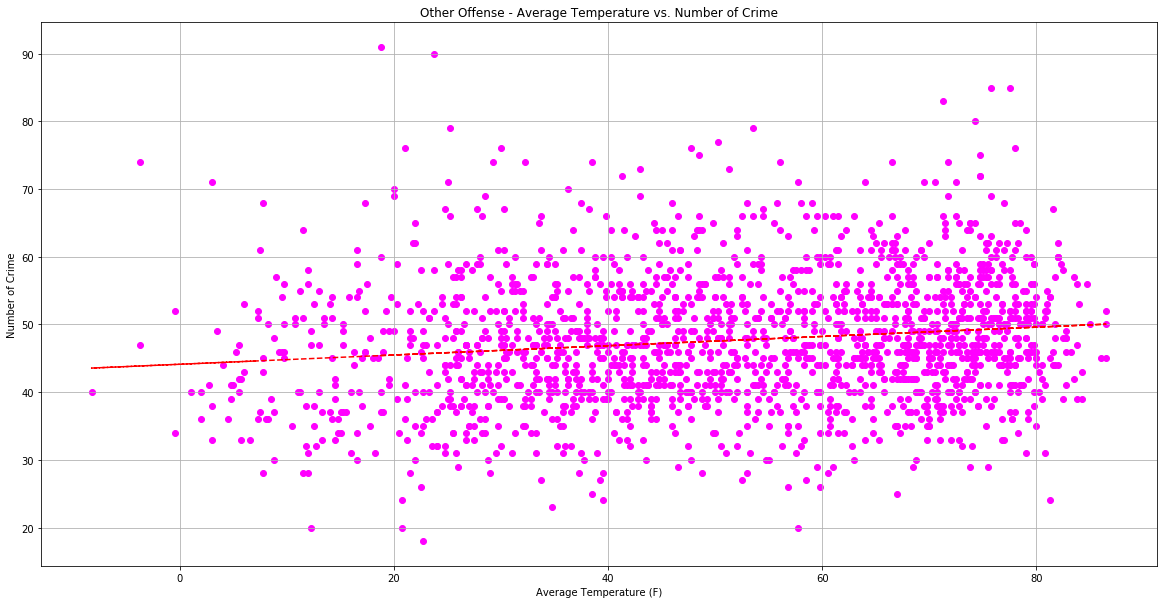

In [39]:
#Other Offense's number of crime per day vs. daily average temperature
plt.figure(7, figsize=(20,10))

plt.scatter(other_offense_daily_crime_and_temp['Daily Average Temperature'], 
            other_offense_daily_crime_and_temp['Number of Crime per Day'], marker="o", color="magenta")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(other_offense_daily_crime_and_temp['Daily Average Temperature'],
               other_offense_daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(other_offense_daily_crime_and_temp['Daily Average Temperature'],
         p(other_offense_daily_crime_and_temp['Daily Average Temperature']),"r--")


#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Other Offense - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [32]:
top_4_narcotics_count = top_4_narcotics_weather_df .groupby('Date')['ID'].count()
top_4_narcotics__weather_daily_avg_temp = top_4_narcotics_weather_df .groupby('Date')['Mean_Temperature'].mean()
narcotics_daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': top_4_narcotics_count ,
                                           'Daily Average Temperature':top_4_narcotics__weather_daily_avg_temp })
narcotics_daily_crime_and_temp = narcotics_daily_crime_and_temp.reset_index()
narcotics_daily_crime_and_temp.head()

,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,60
1,2013-01-02,20.25,87
2,2013-01-03,23.75,105
3,2013-01-04,24.75,109
4,2013-01-05,29.50,92


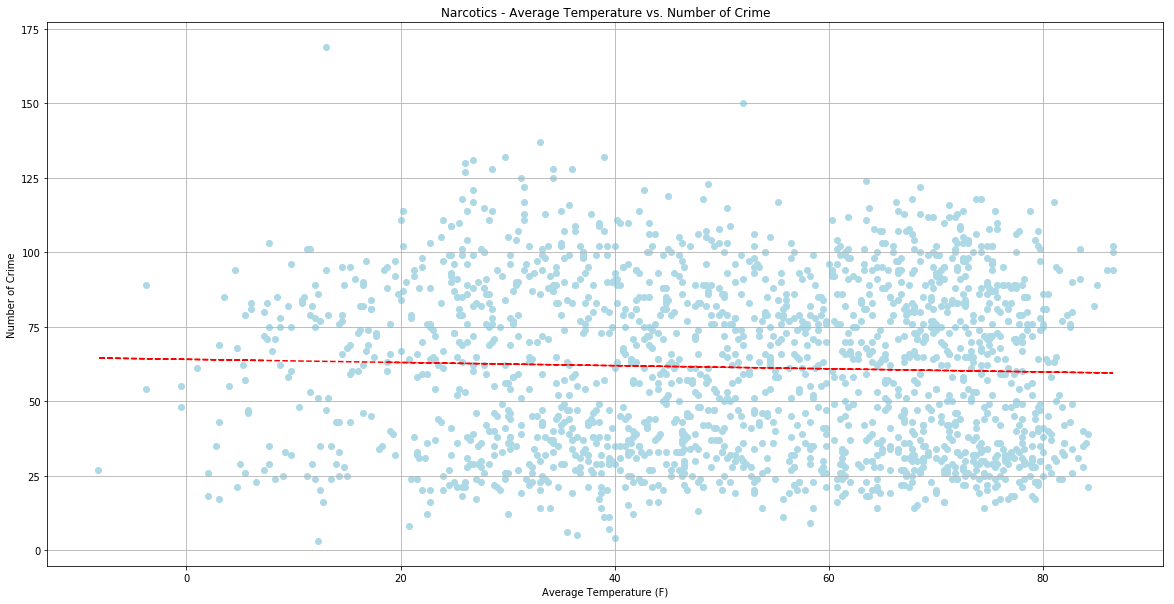

In [38]:
#Other Offense's number of crime per day vs. daily average temperature
plt.figure(9, figsize=(20,10))

plt.scatter(narcotics_daily_crime_and_temp['Daily Average Temperature'], 
            narcotics_daily_crime_and_temp['Number of Crime per Day'], marker="o", color="lightblue")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(narcotics_daily_crime_and_temp['Daily Average Temperature'],
               narcotics_daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(narcotics_daily_crime_and_temp['Daily Average Temperature'],
         p(narcotics_daily_crime_and_temp['Daily Average Temperature']),"r--")


#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Narcotics - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [34]:
#top_5_assault_weather_df
top_5_assault_count = top_5_assault_weather_df.groupby('Date')['ID'].count()
top_5_assault_weather_daily_avg_temp = top_5_assault_weather_df.groupby('Date')['Mean_Temperature'].mean()
assault_daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': top_5_assault_count,
                                           'Daily Average Temperature':top_5_assault_weather_daily_avg_temp})
assault_daily_crime_and_temp = assault_daily_crime_and_temp.reset_index()
assault_daily_crime_and_temp.head()

,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,39
1,2013-01-02,20.25,39
2,2013-01-03,23.75,45
3,2013-01-04,24.75,35
4,2013-01-05,29.50,43


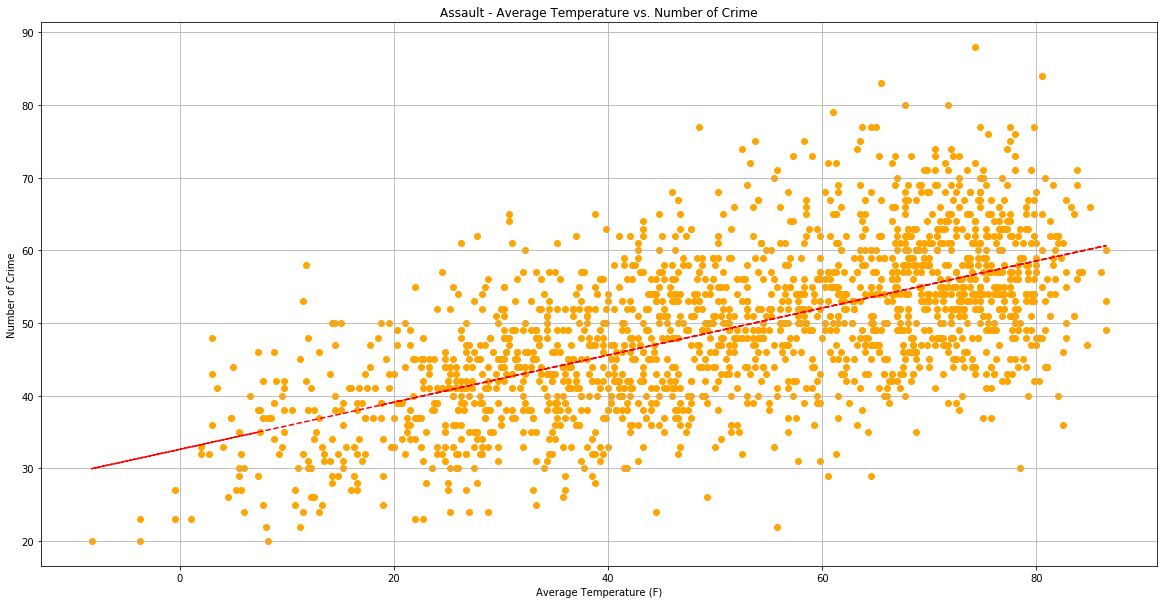

In [36]:
#assault's number of crime per day vs. daily average temperature
plt.figure(10, figsize=(20,10))

plt.scatter(assault_daily_crime_and_temp['Daily Average Temperature'], 
            assault_daily_crime_and_temp['Number of Crime per Day'], marker="o", color="orange")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(assault_daily_crime_and_temp['Daily Average Temperature'],
               assault_daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(assault_daily_crime_and_temp['Daily Average Temperature'],
         p(assault_daily_crime_and_temp['Daily Average Temperature']),"r--")


#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Assault - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [29]:
merged_crime_weather_df_groupby_count = merged_crime_weather_df.groupby('Date')['ID'].count()
merged_crime_weather_df_groupby_avg_temp = merged_crime_weather_df.groupby('Date')['Mean_Temperature'].mean()

daily_crime_and_temp = pd.DataFrame({'Number of Crime per Day': merged_crime_weather_df_groupby_count ,
                                           'Daily Average Temperature':merged_crime_weather_df_groupby_avg_temp})
daily_crime_and_temp = daily_crime_and_temp.reset_index()
daily_crime_and_temp.head()

,Date,Daily Average Temperature,Number of Crime per Day
0,2013-01-01,18.75,1347
1,2013-01-02,20.25,748
2,2013-01-03,23.75,771
3,2013-01-04,24.75,866
4,2013-01-05,29.50,788


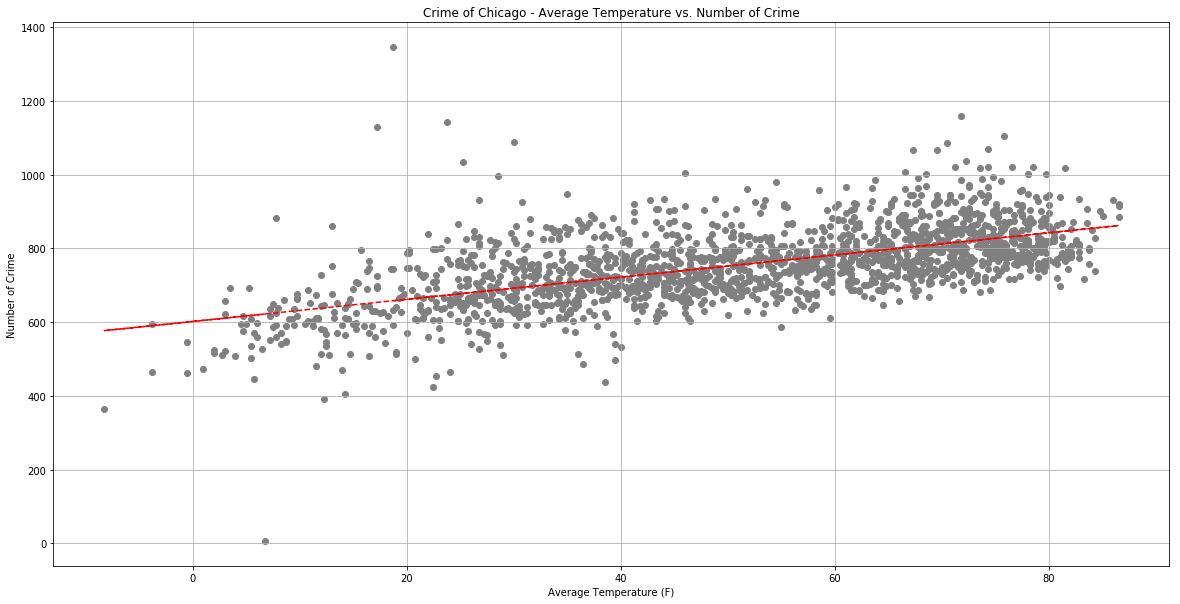

In [37]:
#overall number of crime per day vs. daily average temperature
plt.figure(8, figsize=(20,10))

plt.scatter(daily_crime_and_temp['Daily Average Temperature'], 
            daily_crime_and_temp['Number of Crime per Day'], marker="o", color="grey")

#plt.xcorr(theft_daily_crime_and_temp['Daily Average Temperature'], 
            #theft_daily_crime_and_temp['Number of Crime per Day'])

z = np.polyfit(daily_crime_and_temp['Daily Average Temperature'],
               daily_crime_and_temp['Number of Crime per Day'], 1)
p = np.poly1d(z)
plt.plot(daily_crime_and_temp['Daily Average Temperature'],
         p(daily_crime_and_temp['Daily Average Temperature']),"r--")

#plt.ylim(ymax=100)
#plt.ylim(ymin=0)

#set labels and title
plt.xlabel("Average Temperature (F)")
plt.ylabel("Number of Crime")
plt.title("Crime of Chicago - Average Temperature vs. Number of Crime")

plt.grid()
plt.show()

In [31]:
#pearsonr(x, y)
#r_row, p_value = pearsonr(daily_crime_and_temp['Daily Average Temperature'], daily_crime_and_temp['Daily Average Temperature'])

print('Association between Temperature and Crime Rate in Chicago')

print(pearsonr(daily_crime_and_temp['Daily Average Temperature'], daily_crime_and_temp['Number of Crime per Day']))
print(np.corrcoef(daily_crime_and_temp['Daily Average Temperature'], daily_crime_and_temp['Number of Crime per Day']))

Association between Temperature and Crime Rate in Chicago
(0.6034258781009755, 1.4680564660080224e-181)
[[1.         0.60342588]
 [0.60342588 1.        ]]


In [9]:
chicago_weather_df["temp"]=chicago_weather_df[["BARRINGTON 3SW","CHICAGO BOTANIC GARDEN","CHICAGO MIDWAY AP","CHICAGO MIDWAY AP 3SW", 
                     "CHICAGO NORTHERLY ISLAND", "CHICAGO OHARE INTL AP", "CHICAGO PALWAUKEE AP"]].mean(axis=1)
chicago_weather_df.head(1)

,Date,BARRINGTON 3SW,CHICAGO BOTANIC GARDEN,CHICAGO MIDWAY AP,CHICAGO MIDWAY AP 3SW,CHICAGO NORTHERLY ISLAND,CHICAGO OHARE INTL AP,CHICAGO PALWAUKEE AP,LITTLE RED SCHOOL HOUSE,PARK FOREST,Year-Month-Date,Mean_Temperature,temp
0,2013-01-01,19.5,23,20,19.5,20.5,18.0,17.5,M,27,2013-01-01,18.75,18.75


In [7]:
new_df = chicago_weather_df[["Date","temp"]]
new_df.head(1)

,Date,temp
0,2013-01-01,18.75


In [10]:
new_df.set_index("Date", inplace=True)
new_df.index

Index([2013-01-01, 2013-01-02, 2013-01-03, 2013-01-04, 2013-01-05, 2013-01-06,
       2013-01-07, 2013-01-08, 2013-01-09, 2013-01-10,
       ...
       2017-12-22, 2017-12-23, 2017-12-24, 2017-12-25, 2017-12-26, 2017-12-27,
       2017-12-28, 2017-12-29, 2017-12-30, 2017-12-31],
      dtype='object', name='Date', length=1826)

In [12]:
new_df.head(1)

,temp
Date,
2013-01-01,18.75


In [14]:
new_crime = chicago_crime_df[["Date", "Primary Type"]]
new_crime.head(2)

,Date,Primary Type
0,2017-11-28 21:43:00,OTHER OFFENSE
1,2017-12-11 19:15:00,ROBBERY


In [15]:
new_crime["time"] = pd.to_datetime(new_crime["Date"], format="%Y-%m-%d %H:%M:%S")
new_crime.head(1)

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Primary Type,time
0,2017-11-28 21:43:00,OTHER OFFENSE,2017-11-28 21:43:00


In [16]:
del new_crime["Date"]
new_crime.head(1)

,Primary Type,time
0,OTHER OFFENSE,2017-11-28 21:43:00


In [17]:
new_crime.set_index("time", inplace=True)
new_crime.index

DatetimeIndex(['2017-11-28 21:43:00', '2017-12-11 19:15:00',
               '2017-10-08 03:00:00', '2017-03-28 14:00:00',
               '2017-09-09 20:17:00', '2017-11-23 15:14:00',
               '2017-08-26 10:00:00', '2013-02-10 00:00:00',
               '2015-01-01 00:01:00', '2017-01-01 00:01:00',
               ...
               '2017-12-24 20:30:00', '2017-12-24 15:45:00',
               '2017-12-25 00:16:00', '2017-12-25 15:45:00',
               '2017-12-26 16:10:00', '2017-12-25 10:29:00',
               '2017-12-25 18:05:00', '2017-12-25 12:15:00',
               '2017-12-25 15:35:00', '2017-12-30 01:00:00'],
              dtype='datetime64[ns]', name='time', length=1381201, freq=None)

In [18]:
daily_crime=new_crime.resample("D").count()

In [19]:
daily_crime.head()

,Primary Type
time,
2013-01-01,1347
2013-01-02,748
2013-01-03,771
2013-01-04,866
2013-01-05,788


In [21]:
df = pd.concat([new_df, daily_crime], axis=1)
df.head()

,temp,Primary Type
2013-01-01,18.75,1347
2013-01-02,20.25,748
2013-01-03,23.75,771
2013-01-04,24.75,866
2013-01-05,29.50,788


In [22]:
df = df.rename(columns={"temp": "temperature", "Primary Type": "Crime Count"})
df.head()

,temperature,Crime Count
2013-01-01,18.75,1347
2013-01-02,20.25,748
2013-01-03,23.75,771
2013-01-04,24.75,866
2013-01-05,29.50,788


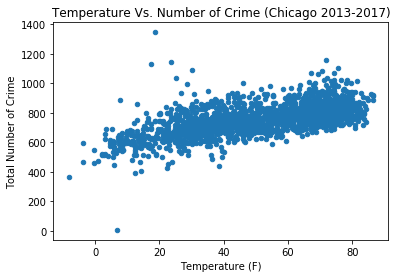

In [23]:
ax = df.plot.scatter(x="temperature", y="Crime Count")
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Total Number of Crime")
ax.set_title("Temperature Vs. Number of Crime (Chicago 2013-2017)")
plt.savefig("Temperature Vs. Number of Crime.png")
plt.show()

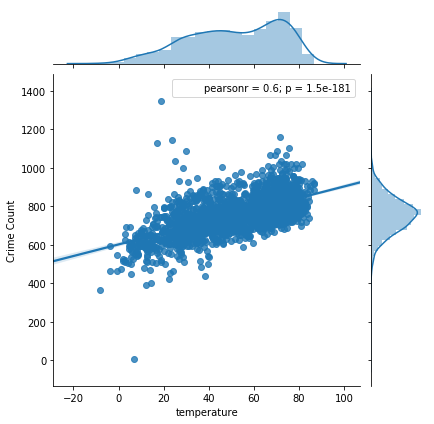

In [24]:
px = sns.jointplot(x="temperature", y="Crime Count", data=df, kind="reg")
plt.savefig("Correlation between Temprature and Crime Rate.png")
plt.show()

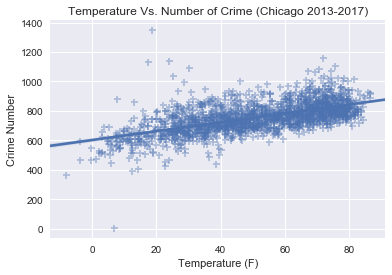

In [25]:
sns.set(color_codes=True)
ax = sns.regplot(x="temperature", y="Crime Count", data=df, scatter_kws={'alpha':0.4}, marker ="+")
ax.set(xlabel='Temperature (F)', ylabel='Crime Number')
ax.set_title("Temperature Vs. Number of Crime (Chicago 2013-2017)")
plt.savefig("Temperature Vs.Crime.png")
plt.show()

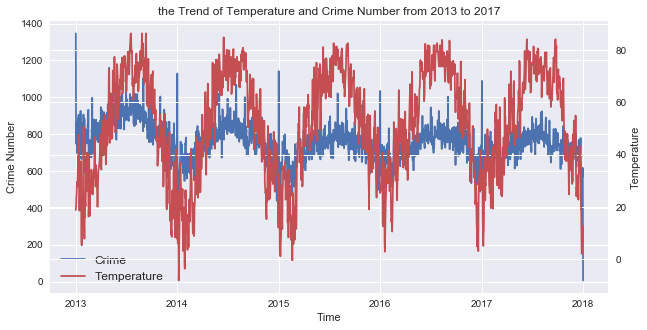

In [26]:
fig, ax1 = plt.subplots(figsize=(10,5))
lns1 = ax1.plot(df["Crime Count"], 'b-', label="Crime")
#ax1.set_xlim(pd.Timestamp('2013-01-01'), pd.Timestamp('2014-08-15'))
ax2 = ax1.twinx()
lns2 = ax2.plot(df["temperature"], 'r-', label="Temperature")
ax1.set(xlabel='Time', ylabel='Crime Number')
ax2.set(ylabel="Temperature")
ax1.set_title("the Trend of Temperature and Crime Number from 2013 to 2017")

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3, fontsize=12)

plt.savefig("the Trend of Temperature and Crime Number from 2013 to 2017.png")
plt.show()

In [27]:
new_crime["no"] = 1

C:\Users\lovel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
new_crime.head(5)

,Primary Type,no
time,,
2017-11-28 21:43:00,OTHER OFFENSE,1
2017-12-11 19:15:00,ROBBERY,1
2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,1
2017-03-28 14:00:00,BURGLARY,1
2017-09-09 20:17:00,THEFT,1


In [29]:
new_crime.groupby("Primary Type")["no"].sum().sort_values(ascending=False).head(5)

Primary Type
THEFT              316180
BATTERY            251733
CRIMINAL DAMAGE    147322
NARCOTICS          111934
ASSAULT             89913
Name: no, dtype: int64

In [30]:
crime_list = ["THEFT", "BATTERY", "CRIMINAL DAMAGE","NARCOTICS","ASSAULT"]

In [31]:
del new_crime["no"]

In [33]:
new_five = new_df.copy()
for i in crime_list:
    new=new_crime[new_crime["Primary Type"]==i].resample("D").count()
    new.columns=[i]
    new_five = pd.concat([new_five, new], axis=1)

C:\Users\lovel\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:87: RuntimeWarning: Cannot compare type 'Timestamp' with type 'date', sort order is undefined for incomparable objects
  result = result.union(other)


In [34]:
new_five.head()

,temp,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,ASSAULT
time,,,,,,
2013-01-01,18.75,253.0,283.0,118.0,60.0,39.0
2013-01-02,20.25,183.0,92.0,80.0,87.0,39.0
2013-01-03,23.75,144.0,111.0,69.0,105.0,45.0
2013-01-04,24.75,201.0,120.0,80.0,109.0,35.0
2013-01-05,29.50,160.0,118.0,85.0,92.0,43.0


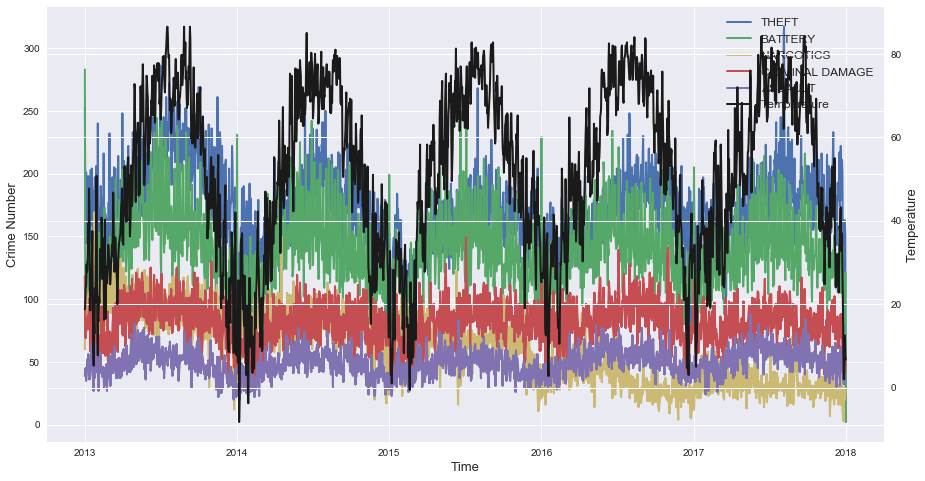

In [35]:
fig, ax1 = plt.subplots(figsize=(15,8))
lns1 = ax1.plot(new_five["THEFT"], 'b-', label="THEFT", linewidth=2)
lns2 = ax1.plot(new_five["BATTERY"], 'g-', label="BATTERY", linewidth=2)
lns3 = ax1.plot(new_five["NARCOTICS"], 'y-', label="NARCOTICS", linewidth=2)
lns4 = ax1.plot(new_five["CRIMINAL DAMAGE"], 'r-', label="CRIMINAL DAMAGE", linewidth=2)
lns5 = ax1.plot(new_five["ASSAULT"], 'm-', label="ASSAULT", linewidth=2)
ax2 = ax1.twinx()
lns6 = ax2.plot(new_five["temp"], 'k-', label="Temperature", linewidth=2)

lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize=12)

ax1.set_xlabel('Time', fontsize=13)
ax1.set_ylabel('Crime Number', fontsize=13)
ax2.set_ylabel('Temperature', fontsize=13)
plt.savefig("top 5 crime vs temperature")

In [36]:
new_five.columns = ["Temperature", "Theft", "Battery", "Criminal Damage", "Narcotics", "Assault"]

In [37]:
corr = new_five.corr()

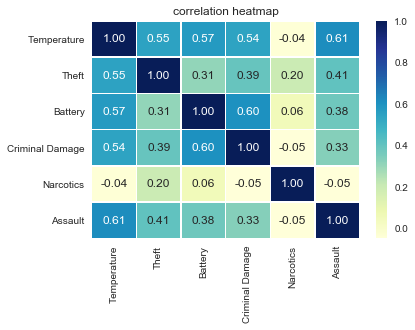

In [38]:
sx = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu", fmt="0.2f")
sx.set_title("correlation heatmap")
plt.savefig("ccorrelation heatmap.png")
plt.show()

In [39]:
new_five.columns

Index(['Temperature', 'Theft', 'Battery', 'Criminal Damage', 'Narcotics',
       'Assault'],
      dtype='object')

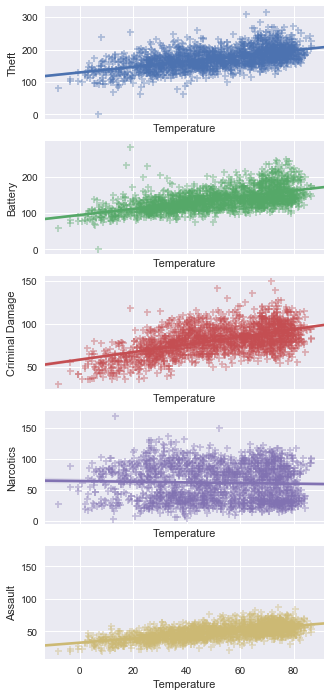

In [40]:
fig, axarr = plt.subplots(5, 1, sharex='all', figsize=(5,12))
for i in np.arange(1, 6):
    sns.regplot(x="Temperature", y=new_five.columns[i], data=new_five, scatter_kws={'alpha':0.4}, marker ="+", ax=axarr[i-1])
plt.savefig("temperature Vs Crime Type.png")
plt.show()

In [41]:
new_five.head()

new_comb = pd.melt(new_five, id_vars=['Temperature'])
new_comb.head()

,Temperature,variable,value
0,18.75,Theft,253.0
1,20.25,Theft,183.0
2,23.75,Theft,144.0
3,24.75,Theft,201.0
4,29.50,Theft,160.0


In [42]:
new_comb.columns = ["Temperature", "CrimeType", "Crime Number"]

C:\Users\lovel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\lovel\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 9128 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


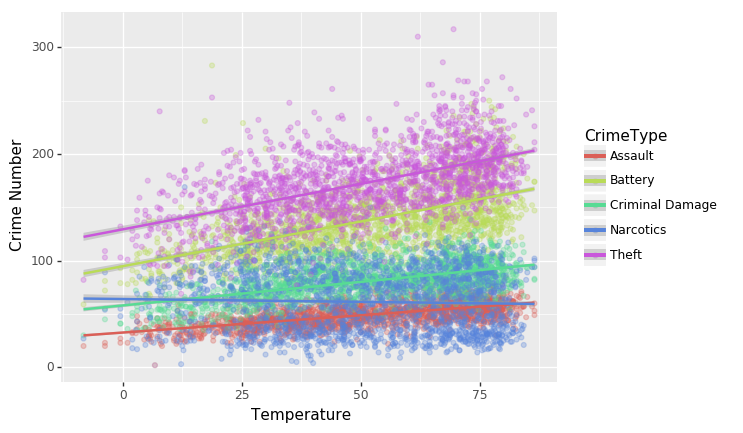

<ggplot: (98018365448)>

In [43]:
from plotnine import *

# R style code

ggplot(new_comb) + aes(x='Temperature', y='Crime Number') + aes(color='CrimeType')+ geom_point(alpha=0.3) +  stat_smooth()

C:\Users\lovel\Anaconda3\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 9128 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


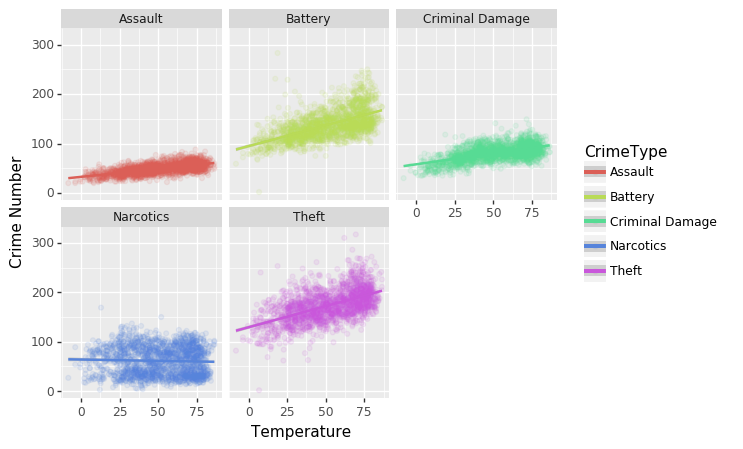

<ggplot: (98018420470)>

In [44]:
(ggplot(new_comb) + aes(x='Temperature', y='Crime Number') + geom_point(alpha=0.1) +  aes(color='CrimeType')+
 stat_smooth() +  facet_wrap("~CrimeType"))
